**Вакуленков Данила, С01-019**

# Лабораторная работа №6. Многоскоростная обработка сигналов.

Лаборатория цифровой обработки сигналов, МФТИ.

В названии файла заменить `familyname` на свою фамилию. Для выполнения задания требуются два сигнала с цифрового осциллографа (см. задачи 1.2 и 2.1).

Максимальная оценка по данной лабораторной работе ограничивается после дня зачета.  Вклад задач в итоговую оценку при сдаче на занятиях:
* 1.1 - 1 балл,
* 1.2 - 2 балла,
* 1.3 - 1 балл,
* 2.1 - 2 балла,
* 2.2 - 2 балла,
* 3.1 - 1 балл,
* 3.2 - 1 балл.




In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот,
        соотвествующих вычисленным значениям
        спектральной функции
    complex
        значения спектральной функции
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))
def oscilloscope_file_read(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed

    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3
    fs = int(1.0 / val)

    #Voltage step
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
    return fs, signal_lev

def analyse(fs, signal_lev, window='boxcar', stem_signal=False):
    figsize=[8,4]
    plt.rcParams['font.size'] = '12'
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    if stem_signal:
        plt.stem(np.arange(signal_lev.size)/fs*1e3, signal_lev, markerfmt='.')
    else:
        plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
    plt.show()

<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:72: SyntaxWarning: invalid escape sequence '\D'
/var/folders/63/j0gdldts0vs5q29gk1kz7xyr0000gn/T/ipykernel_6466/19032183.py:72: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")


In [4]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
# %matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.

| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $N$   |  16 |  16 |  16 |  16 |  16 |  30 |  30 |  30 |  30 |   30 |   20 |   20 |   20 |   20 |   20 |   32 |   32 |   32 |   32 |   32 |
| $A_1$ |   2 |   3 |   4 |   5 |   6 |   2 |   3 |   4 |   5 |    6 |    2 |    3 |    4 |    5 |    6 |    2 |    3 |    4 |    5 |    6 |
| $n_1$ |   3 |   4 |   5 |   6 |   7 |   3 |   4 |   5 |   6 |    7 |    3 |    4 |    5 |    6 |    7 |    3 |    4 |    5 |    6 |    7 |
| $A_2$ |   3 |   5 |   1 |   2 |   5 |   3 |   5 |   1 |   2 |    5 |    3 |    5 |    1 |    2 |    5 |    3 |    5 |    1 |    2 |    5 |
| $n_2$ |   7 |   5 |   7 |   4 |   2 |   7 |   5 |   7 |   4 |    2 |    7 |    5 |    7 |    4 |    2 |    7 |    5 |    7 |    4 |    2 |

Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов:
 $$ x[k] = A_1\cos{\left (2\pi\dfrac{n_1}{N} k \right )} + A_2 \cos{\left (2\pi\dfrac{n_2}{N} k \right )}.$$
Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

In [6]:
N = 20
A1 = 6
n1 = 7
A2 = 5
n2 = 2
L = 5

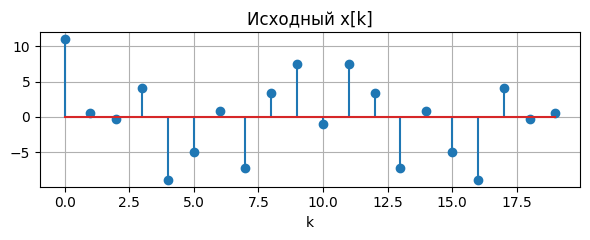

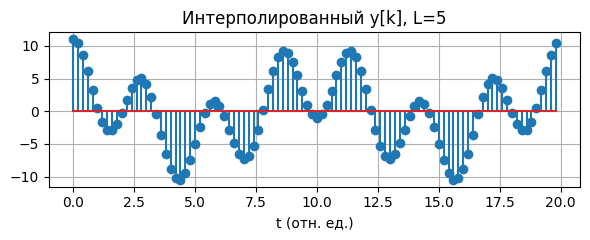

In [7]:
import numpy as np
import matplotlib.pyplot as plt


k = np.arange(N)
x = A1*np.cos(2*np.pi*n1/N*k) + A2*np.cos(2*np.pi*n2/N*k)

X = np.fft.fft(x)/N
Y = np.hstack((
    X[:N//2],
    X[N//2]/2,
    np.zeros((L-1)*N-1),
    X[N//2]/2,
    X[N//2+1:]
))
y = np.fft.ifft(Y) * L * N

plt.figure(figsize=(6,2.5))
plt.stem(k, x)
plt.title("Исходный x[k]")
plt.xlabel("k")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,2.5))
ki = np.arange(L*N)
plt.stem(ki/L, y.real)
plt.title(f"Интерполированный y[k], L={L}")
plt.xlabel("t (отн. ед.)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Задача 1.2. Система однократной интерполяции.

|             |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:------------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $f_0$, кГц  |  25 |  22 |  23 |  26 |  28 |  25 |  22 |  23 |  26 |   28 |   25 |   22 |   23 |   26 |   28 |   25 |   22 |   23 |   26 |   28 |
| $f_m$, кГц  |  10 |  10 |  10 |  10 |  10 |   9 |   9 |   9 |   9 |    9 |    8 |    8 |    8 |    8 |    8 |    7 |    7 |    7 |    7 |    7 |
| Коэф. АМ, % |  80 |  70 |  80 |  70 |  80 |  70 |  80 |  70 |  80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |   80 |   70 |
| $f_д$, кГц  | 200 | 200 | 200 | 200 | 200 | 200 | 200 | 200 | 200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |  200 |
| $L$         |   3 |   4 |   5 |   3 |   4 |   5 |   4 |   3 |   4 |    5 |    3 |    4 |    5 |    3 |    4 |    5 |    4 |    3 |    4 |    5 |

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ с помощью функции ``scipy.signal.upfirdn()`` при подаче на ее вход нескольких первых отсчетов (составляющих примерно один период) амплитудно модулированного сигнала с цифрового осциллографа с параметрами из таблицы.

1. Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции в частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы интерполяции.



In [8]:
f0_kHz = 28
fm_kHz = 8
m_pc = 80
fs_kHz = 200
L = 4
f0, fm, fs, m = f0_kHz*1e3, fm_kHz*1e3, fs_kHz*1e3, m_pc/100

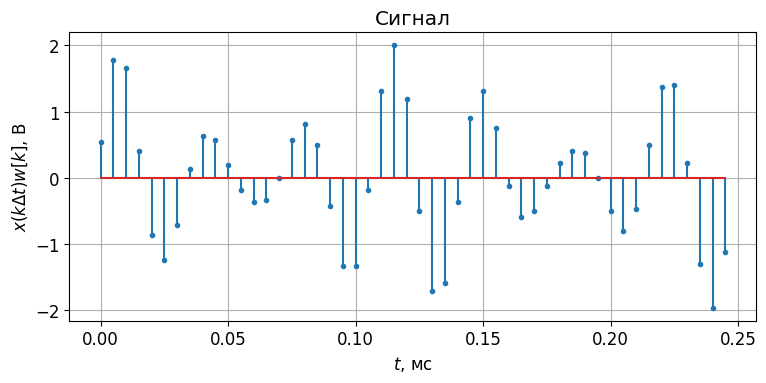

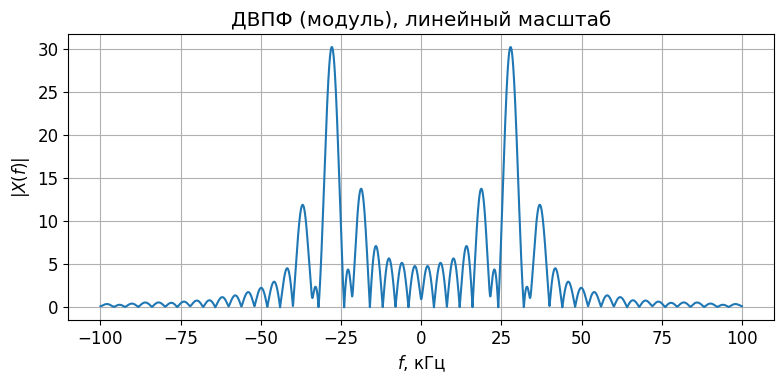

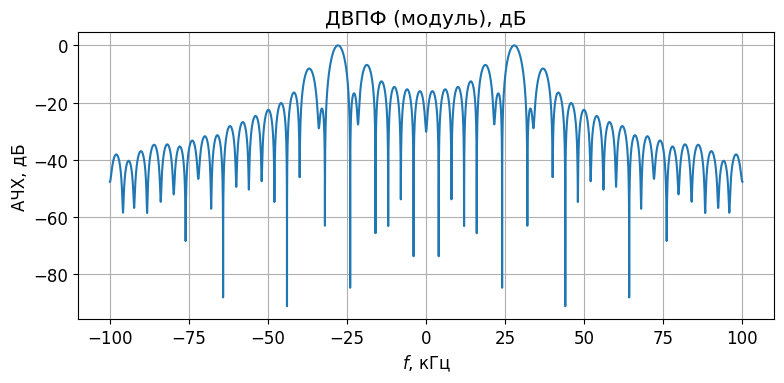

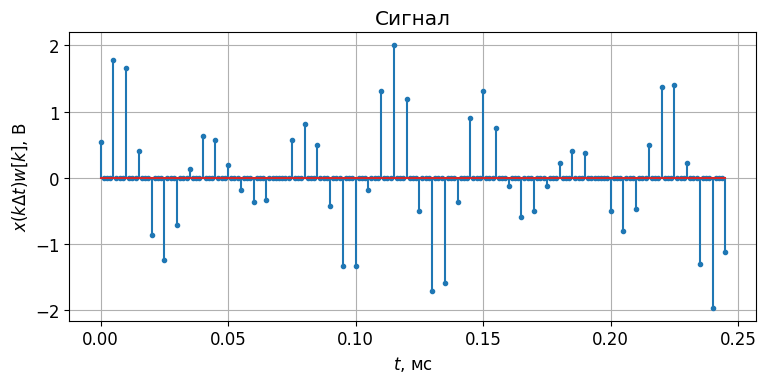

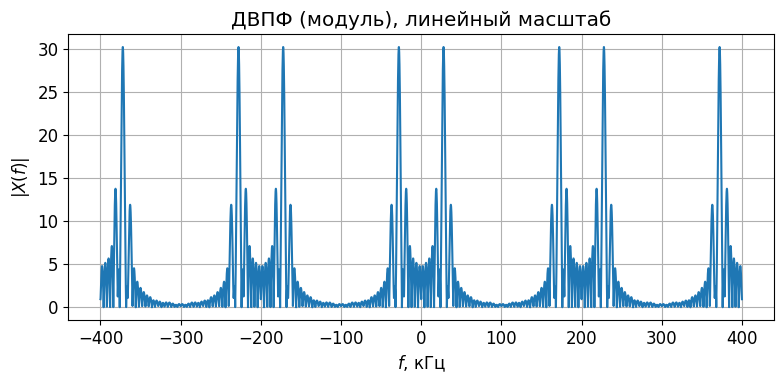

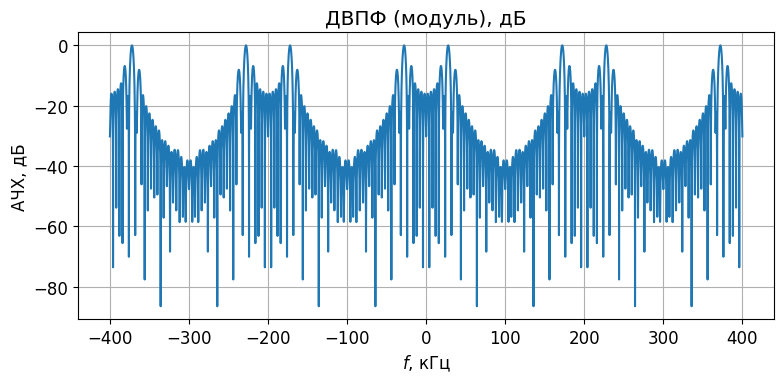

In [9]:
fs12 = None
fs12, sig12 = oscilloscope_file_read('1-2_15var.txt', const_level=0)
analyse(fs12, sig12[:50], window='boxcar', stem_signal=True)

q2   = signal.upfirdn([1], sig12[:50], up=L)
fs_q2= fs12 * L
analyse(fs_q2, q2, window='boxcar', stem_signal=True)


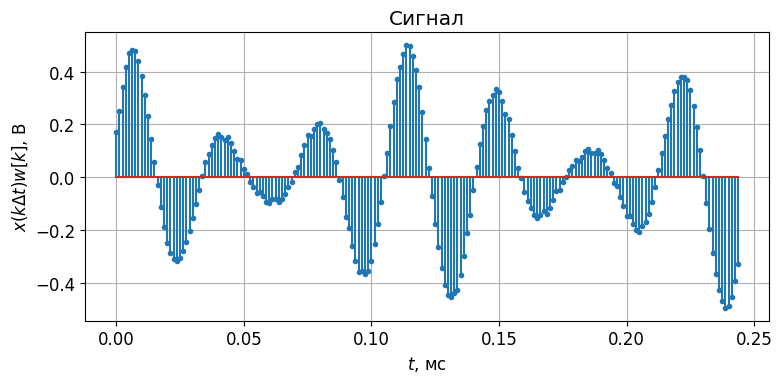

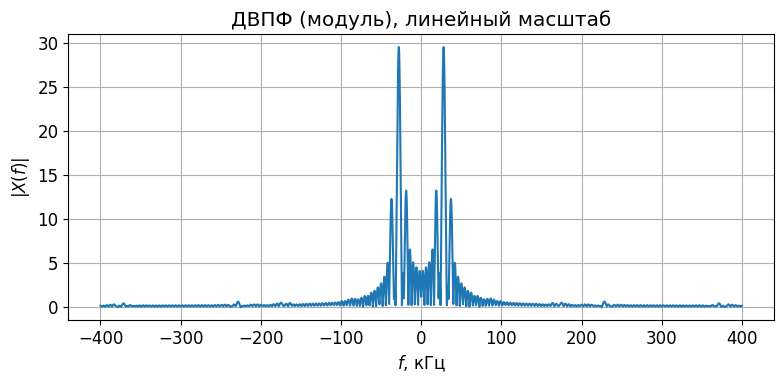

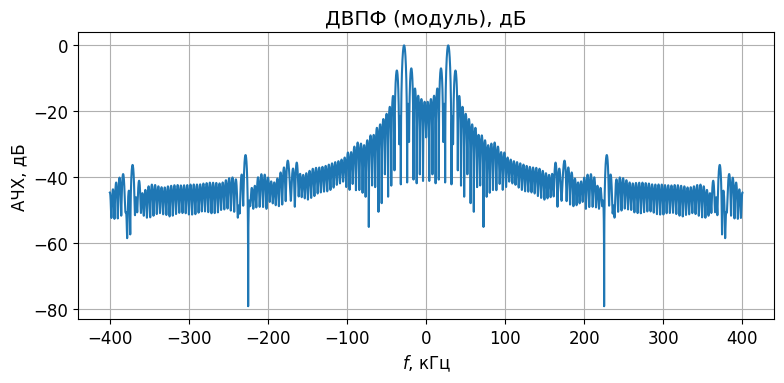

In [11]:
# КИХ-фильтр
numtaps = 64
bands   = [0, 1/(2*L)*0.9, 1/(2*L)*1.1, 0.5]
h_int   = signal.remez(numtaps, bands, [1,0], fs=1) # подавляет зеркальные копии спектра, возникающие при вставке нулей, имеет линейную фазу -> сохраняет форму импульсов.
delay   = numtaps//2

y2   = signal.upfirdn(h_int, sig12[:50], up=L)[delay:-delay]
fs_y2= fs12 * L
analyse(fs_y2, y2, window='boxcar', stem_signal=True)

## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



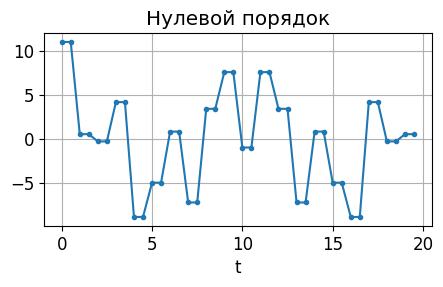

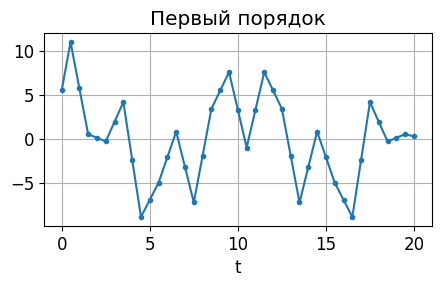

In [9]:
L = 2

# нулевой порядок
h0 = np.array([1, 1])

# первый порядок
h1 = np.array([0.5, 1.0, 0.5])

y0 = signal.upfirdn(h0, x, up=L)
y1 = signal.upfirdn(h1, x, up=L)

t0 = np.arange(y0.size)/L
t1 = np.arange(y1.size)/L

plt.figure(figsize=(5,2.5))
plt.plot(t0, y0, '.-')
plt.title("Нулевой порядок"); plt.xlabel("t"); plt.grid(True)

plt.figure(figsize=(5,2.5))
plt.plot(t1, y1, '.-')
plt.title("Первый порядок"); plt.xlabel("t"); plt.grid(True)

#  Модуль 2. Прореживание сигналов и передискретизация с рациональным шагом.

## Задача 2.1. Система однократной децимации.

| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:-----------|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $f_0$, кГц |  80 |  90 | 100 | 110 | 120 | 130 | 140 | 150 | 160 |  170 |  180 |  190 |  200 |  210 |  220 |  230 |  240 |  250 |  260 |  270 |
| $f_д$, МГц |  10 |  20 |  10 |  20 |  10 |  20 |  10 |  20 |  10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |   10 |   20 |
| $M$        |   5 |  10 |   5 |  10 |   5 |  10 |   5 |  10 |   5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |    5 |   10 |

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход нескольких первых отсчетов синусоидального сигнала с цифрового осциллографа с параметрами из таблицы.

1. Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы.

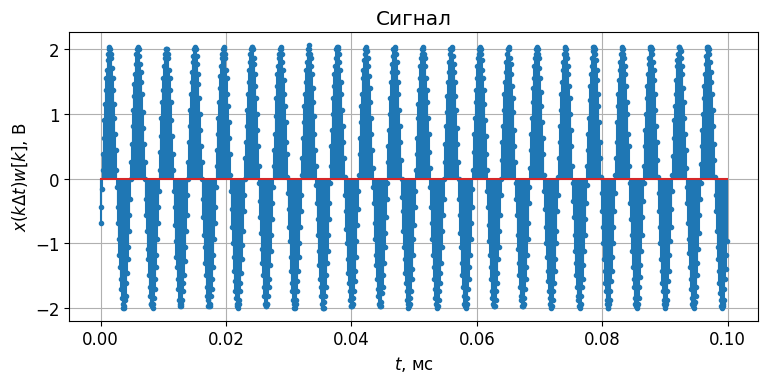

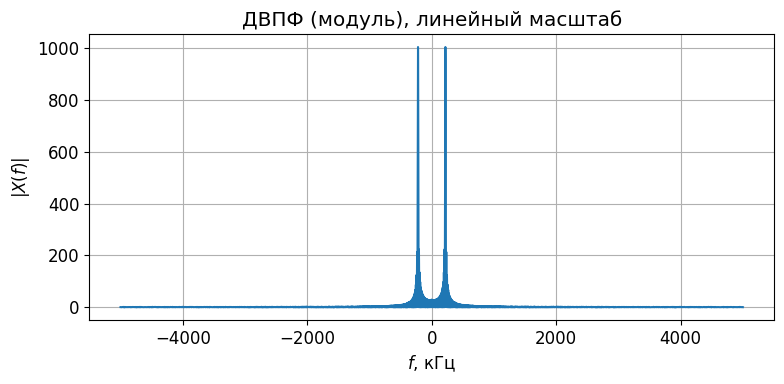

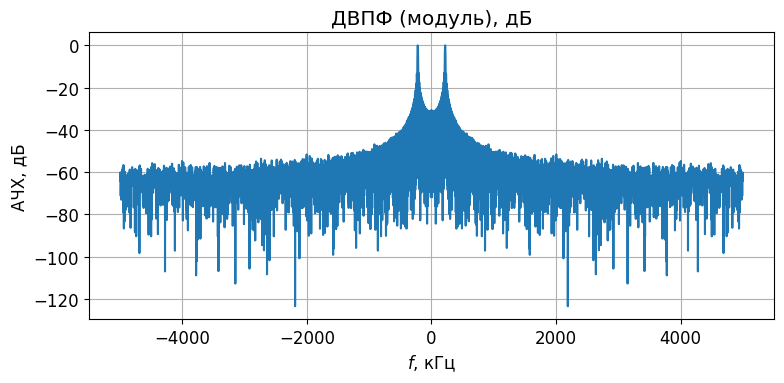

In [13]:
fs21, sig21 = oscilloscope_file_read('2_1_15var.txt', const_level=0)
analyse(fs21, sig21, window='boxcar', stem_signal=True)

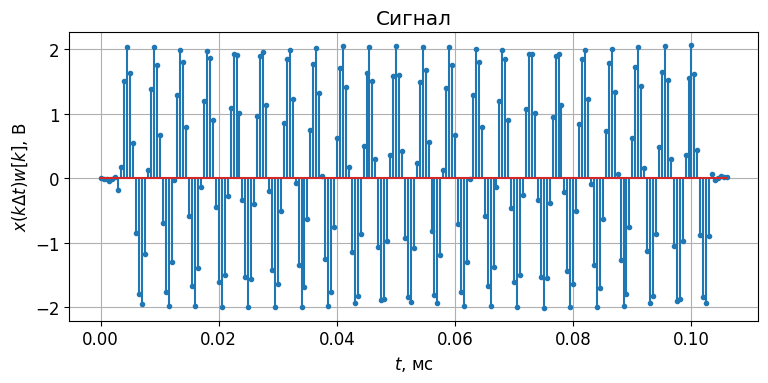

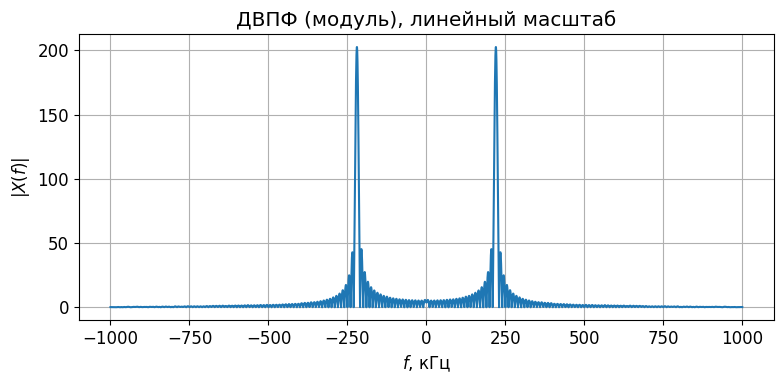

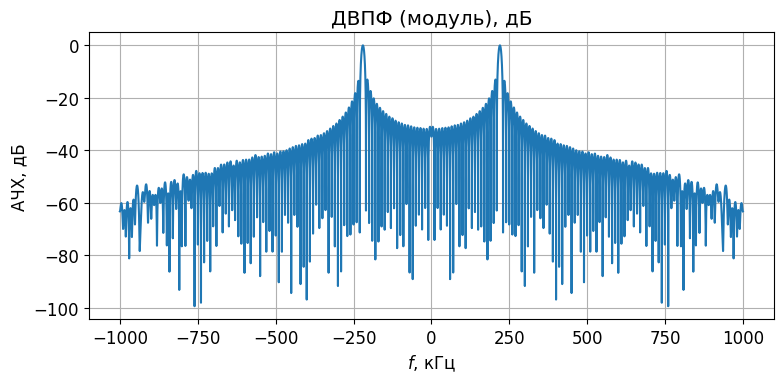

In [14]:
M = 5
y3 = signal.upfirdn(h_int, sig21, down=M)
analyse(fs21/M, y3, window='boxcar', stem_signal=True)

## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала из задачи 2.1.

1. Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2. Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3. Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4. Укажите шаг и частоту дискретизации выходного сигнала системы.

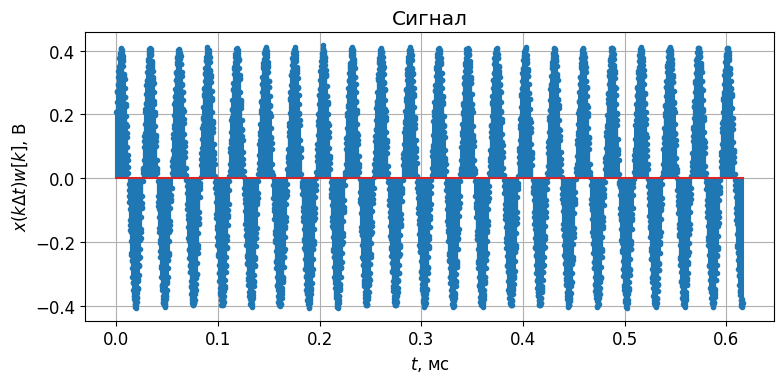

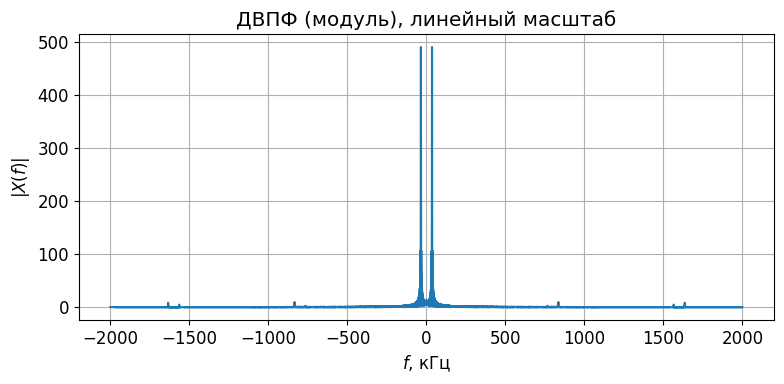

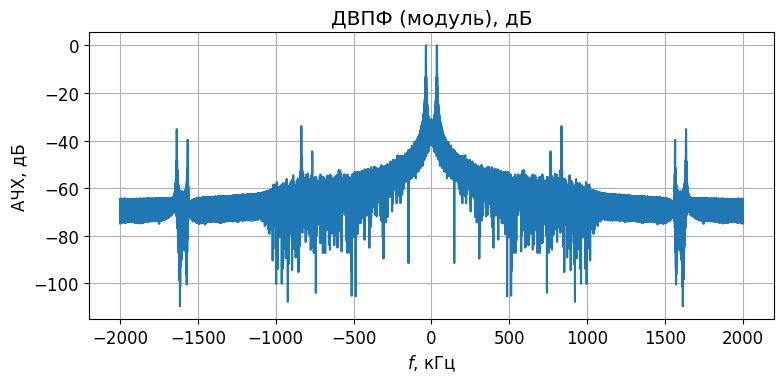

In [15]:
L2, M2 = 5, 2
y4     = signal.upfirdn(h_int, sig21, up=L2, down=M2)
delay4 = numtaps//2
y4     = y4[delay4:-delay4]
analyse(fs21*M2/L2, y4, window='boxcar', stem_signal=True)

#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала из задачи 2.1 с помощью функции ``scipy.signal.resample_poly()``.


1. Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2. Изобразите схему данной полифазной структуры однократной интерполяции.

3. Укажите шаг и частоту дискретизации выходного сигнала системы.


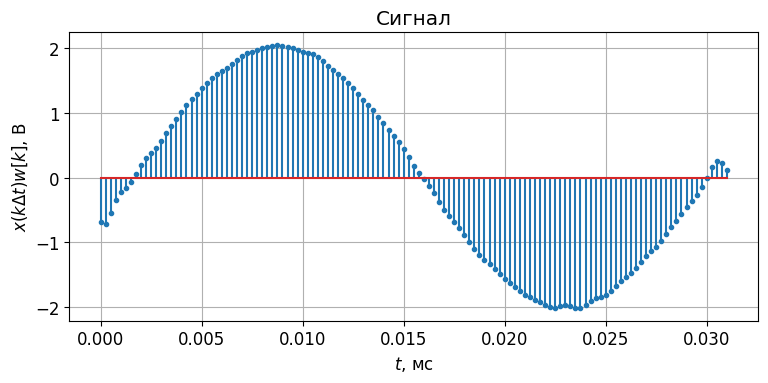

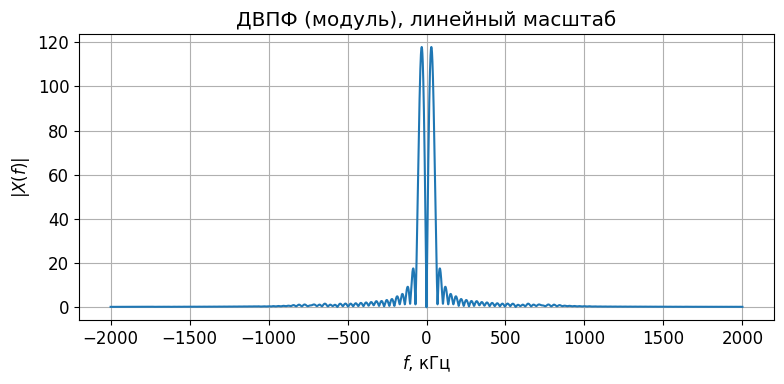

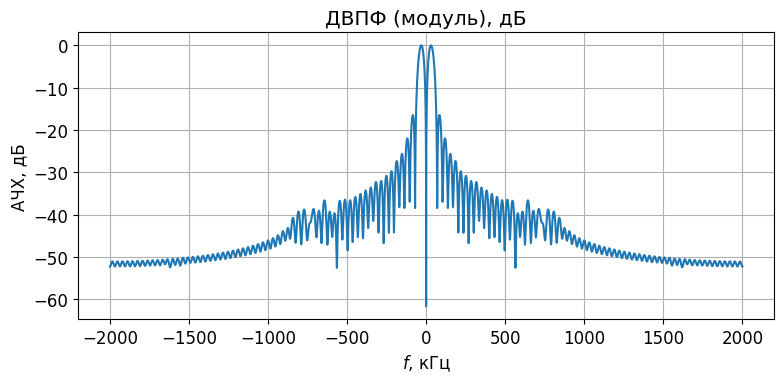

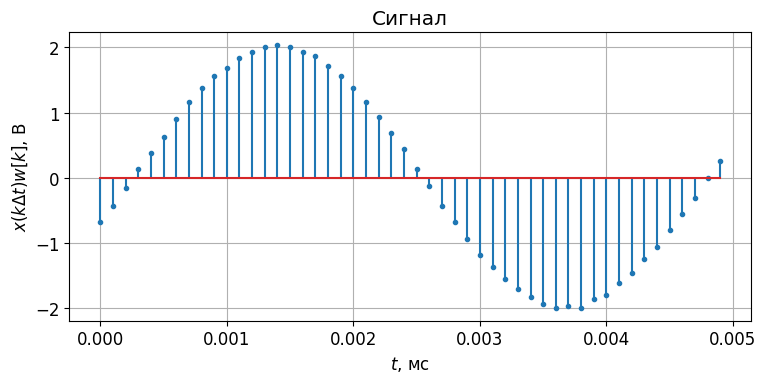

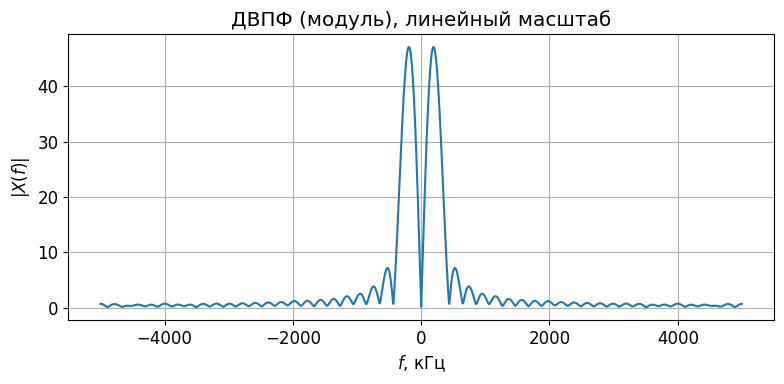

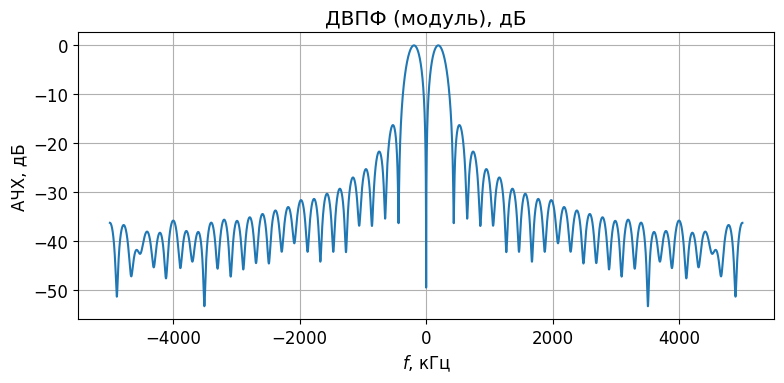

In [18]:
y5 = signal.resample_poly(sig21[:50], up=L2, down=M2)
analyse(fs21*M2/L2, y5, window='boxcar', stem_signal=True)

analyse(fs21, sig21[:50], window='boxcar', stem_signal=True)

## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.


| Варианты: |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |
|:----|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $N$ |  16 |  16 |  16 |  16 |  16 |  12 |  12 |  12 |  12 |   12 |   20 |   20 |   20 |   20 |   20 |   32 |   32 |   32 |   32 |   32 |
| $Q$ |   3 |   4 |   5 |   6 |   7 |   3 |   4 |   5 |   6 |    7 |    3 |    4 |    5 |    6 |    7 |    3 |    4 |    5 |    6 |    7 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). Постройте блок-схему одной из возможных реализаций даннного цифрового фильтра.





Рекурсивная схема -> 1 умножитель на -1, все остальное - задержки
Импульсная характеристика - треугольная


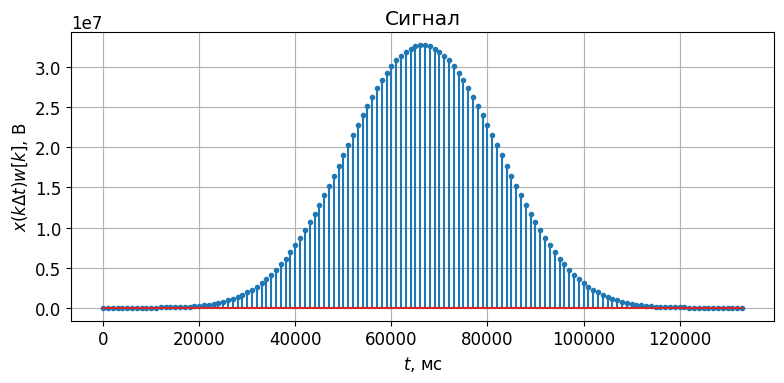

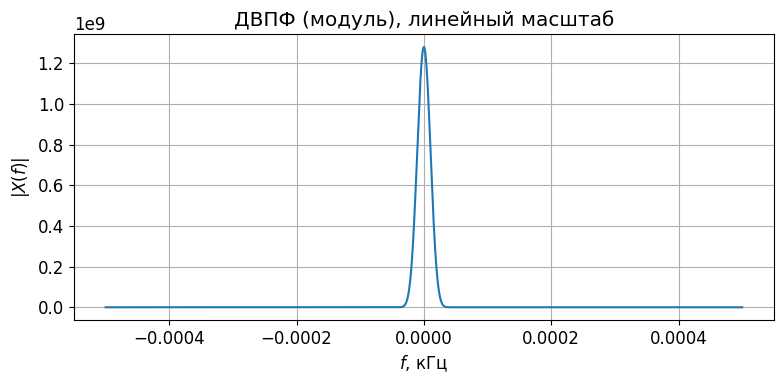

/var/folders/63/j0gdldts0vs5q29gk1kz7xyr0000gn/T/ipykernel_46192/19032183.py:91: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))


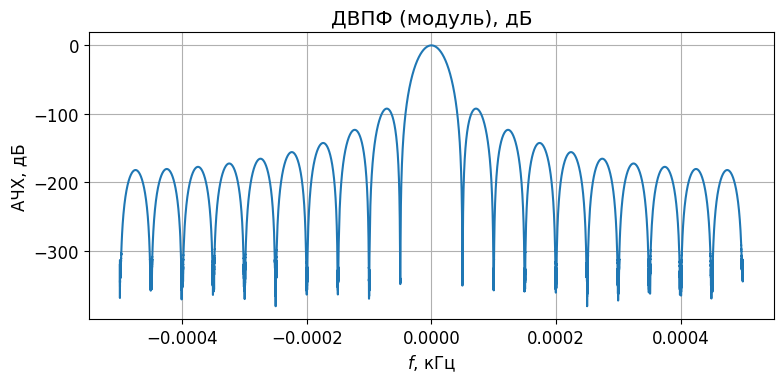

In [14]:
N_cic = 20
Q_cic = 7
h1    = np.ones(N_cic)
hq    = h1.copy()
for _ in range(1, Q_cic):
    hq = np.convolve(hq, h1)
analyse(1, hq, window='boxcar', stem_signal=True)